# Modelling a Random Forest classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

### Feature names

In [3]:
with open('../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [4]:
feature_names[:3]

['YEAR_2014', 'YEAR_2015', 'YEAR_2016']

### X and Y

In [5]:
X_train = np.load('../data/X_train.npy')

In [6]:
X_train.shape

(12648, 888)

In [7]:
X_test = np.load('../data/X_test.npy')

In [8]:
X_test.shape

(3163, 888)

In [9]:
y_train = np.load('../data/y_train.npy')

In [10]:
y_train.shape

(12648,)

In [11]:
y_test = np.load('../data/y_test.npy')

In [12]:
y_test.shape

(3163,)

### Modelling

In [13]:
model = RandomForestClassifier(random_state=42)

In [14]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [15]:
model.score(X_test, y_test)

1.0

In [16]:
model.classes_

array([False,  True])

In [17]:
model.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
y_pred = model.predict(X_test)

In [19]:
sum(y_pred) / float(len(y_pred))

0.8808093582042364

In [20]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00       377
       True       1.00      1.00      1.00      2786

avg / total       1.00      1.00      1.00      3163



In [21]:
importances = model.feature_importances_

In [22]:
# importances

In [23]:
indices = np.argsort(importances)[::-1]

In [24]:
# indices

In [27]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names))[:25]:
    print("%d. Feature %s [%d] (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))
print('etc')

Feature ranking:
1. Feature FIRST_RESULT_P [821] (0.193513)
2. Feature Y2_RETURN_N [728] (0.143343)
3. Feature Y2_RETURN_Y [729] (0.093925)
4. Feature PASS_M8_N [737] (0.092339)
5. Feature FIRST_RESULT_F [819] (0.084504)
6. Feature PASS_M5_Y [735] (0.084378)
7. Feature NUM_M5_FAILS [838] (0.058982)
8. Feature NEXT_RESULT_P [727] (0.041122)
9. Feature PASS_M8_0 [736] (0.032744)
10. Feature PASS_M8_Y [738] (0.018662)
11. Feature TOTAL_YEARS [823] (0.016341)
12. Feature PASS_M5_N [734] (0.015935)
13. Feature NUM_M8_SUBJECTS [836] (0.012024)
14. Feature EARLY_TRANSFER_N [5] (0.009571)
15. Feature NUM_M1_FAILS [837] (0.006141)
16. Feature PASS_M1_N [731] (0.004311)
17. Feature CAO_POINTS [827] (0.003522)
18. Feature NEXT_CODE_CA [677] (0.003349)
19. Feature PREV_RESULT_F [429] (0.002064)
20. Feature NUM_MAY_TYPE_D [882] (0.001914)
21. Feature FIRST_CANX_2017.0 [644] (0.001876)
22. Feature YEARS_SINCE_LC [826] (0.001818)
23. Feature DAYS_TO_FIRST_REG [824] (0.001797)
24. Feature BIO_SEX_M [7

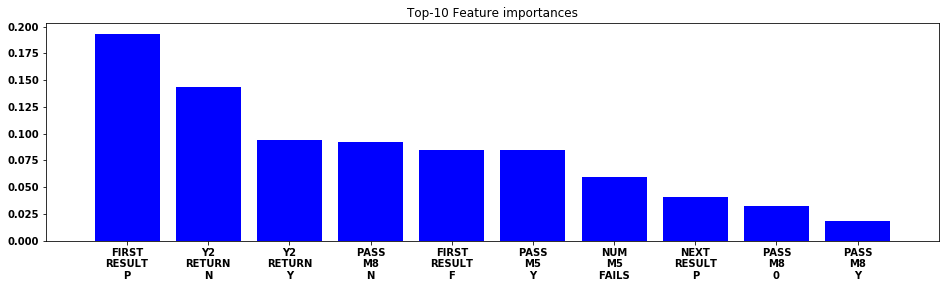

In [28]:
N = 10

# Plot the feature importances of the forest
plt.figure(figsize=(16, 4))
plt.title("Top-{} Feature importances".format(N))
# plt.bar(range(len(feature_names)), importances[indices], color="b", align="center")
plt.bar(range(N), importances[indices][:N], color="b", align="center")
# plt.xticks(range(len(feature_names)), indices)
plt.xticks(range(N), [ feature_names[index].replace('_', '\n') for index in indices[:N] ])
plt.xlim([-1, N])
plt.savefig('../figures/modelling_Random_Forest_Top_10_Feature_Importances.png', bbox_inches="tight")
plt.show()

## Dropping important columns

In [29]:
patterns_to_drop = [
    'FIRST_RESULT_',
    'Y2_RETURN_',
    'NUM_M1_FAILS',
    'NUM_M5_FAILS',
    'PASS_M1_',
    'PASS_M5_',
    'PASS_M8_',
    'NEXT_RESULT_',
]

In [30]:
cols_to_drop = [col for col in feature_names for pattern in patterns_to_drop if pattern in col]

In [31]:
cols_to_drop

['NEXT_RESULT_F',
 'NEXT_RESULT_F0',
 'NEXT_RESULT_P',
 'Y2_RETURN_N',
 'Y2_RETURN_Y',
 'PASS_M1_0',
 'PASS_M1_N',
 'PASS_M1_Y',
 'PASS_M5_0',
 'PASS_M5_N',
 'PASS_M5_Y',
 'PASS_M8_0',
 'PASS_M8_N',
 'PASS_M8_Y',
 'FIRST_RESULT_F',
 'FIRST_RESULT_F0',
 'FIRST_RESULT_P',
 'NUM_M1_FAILS',
 'NUM_M5_FAILS']

In [32]:
indexes_to_drop = [ feature_names.index(col) for col in cols_to_drop ]

In [33]:
indexes_to_drop

[725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 819,
 820,
 821,
 837,
 838]

In [34]:
X_train = np.delete(X_train, indexes_to_drop, axis=1)

In [35]:
X_train.shape

(12648, 869)

In [36]:
X_test = np.delete(X_test, indexes_to_drop, axis=1)

In [37]:
X_test.shape

(3163, 869)

In [39]:
# Note that you need to delete them in reverse order so that you don't throw off the subsequent indexes.
for index in sorted(indexes_to_drop, reverse=True):
    del feature_names[index]

In [40]:
len(feature_names)

869

In [41]:
model = RandomForestClassifier(random_state=42)

In [42]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
model.score(X_test, y_test)

0.9516282010749288

In [44]:
model.classes_

array([False,  True])

In [45]:
model.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
y_pred = model.predict(X_test)

In [47]:
sum(y_pred) / float(len(y_pred))

0.9007271577616187

In [48]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      False       0.86      0.71      0.78       377
       True       0.96      0.98      0.97      2786

avg / total       0.95      0.95      0.95      3163



In [49]:
importances = model.feature_importances_

In [50]:
# importances

In [51]:
indices = np.argsort(importances)[::-1]

In [52]:
# indices

In [54]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names))[:25]:
    print("%d. Feature %s [%d] (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))
print('etc')

Feature ranking:
1. Feature NUM_M8_SUBJECTS [819] (0.244981)
2. Feature TOTAL_YEARS [806] (0.104532)
3. Feature NUM_FEB_ACCESS_DAYS [851] (0.018228)
4. Feature AGE_AT_START [820] (0.015441)
5. Feature CAO_POINTS [810] (0.014768)
6. Feature DAYS_TO_FIRST_LOAN [822] (0.013780)
7. Feature DAYS_TO_FIRST_REG [807] (0.013503)
8. Feature NUM_M1_SUBJECTS [817] (0.012169)
9. Feature SCH_ENROLMENTS [808] (0.011614)
10. Feature DAYS_TO_FIRST_ACCESS [824] (0.009955)
11. Feature LC_MATHS_POINTS [811] (0.009905)
12. Feature NUM_EARLY_ACCESS_DAYS [842] (0.009542)
13. Feature YR_NUM [805] (0.009296)
14. Feature DAYS_TO_FIRST_LAB [823] (0.008723)
15. Feature DAYS_TO_FIRST_CRM [867] (0.008158)
16. Feature NUM_SOCIETIES [815] (0.008112)
17. Feature DAYS_FIRST_SUBMITTED_EARLY [826] (0.007505)
18. Feature NUM_EARLY_ASSIGNMENTS [835] (0.007258)
19. Feature NUM_M5_SUBJECTS [818] (0.007122)
20. Feature EARLY_Q2_SUBS_PC [838] (0.006765)
21. Feature NEXT_CODE_CE [681] (0.006714)
22. Feature NUM_MEMBERSHIPS [814

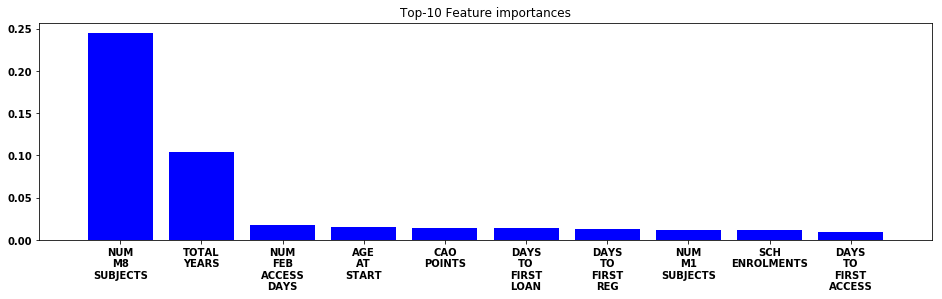

In [55]:
N = 10

# Plot the feature importances of the forest
plt.figure(figsize=(16, 4))
plt.title("Top-{} Feature importances".format(N))
# plt.bar(range(len(feature_names)), importances[indices], color="b", align="center")
plt.bar(range(N), importances[indices][:N], color="b", align="center")
# plt.xticks(range(len(feature_names)), indices)
plt.xticks(range(N), [ feature_names[index].replace('_', '\n') for index in indices[:N] ])
plt.xlim([-1, N])
plt.savefig('../figures/modelling_Random_Forest_less_important_features_Top_10_Feature_Importances.png', 
            bbox_inches="tight")
plt.show()